# Cvičení 5 - naivní Bayesův klasifikátor

V dnešním cvičení se budeme zabývat řešením problému klasifikace pomocí metody nazývané naivní Bayesův klasifikátor (Naive Bayes).

Pro data s diskrétními hodnotami příznaků je MAP odhad predikované proměnné $Y$ naivního Bayesova klasifikátoru roven

$$
\hat Y = \arg \max_{y \in \mathcal Y} \prod_{i = 1}^p P(X_i = x_i | Y = y) P(Y = y).
$$

Dokumentace a příklady pro dostupné metody ve `scikit-learn` jsou [zde](https://scikit-learn.org/stable/modules/naive_bayes.html).

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Binární příznaky - Bernoulliho rozdělení podmíněné pravděpodobnosti

Zabývejme se nyní situací s binární klasifikace s binárními příznaky. V takovém případě 
podmíněné pravděpodobnosti $P(X = x | Y = y)$ pro příznak $X$ mají Bernoulliho rozdělení s parametrem $p_y = P(X = 1|Y = y)$.

Uvažujme jako na přednášce data obsahující tři binární příznaky $X_1, X_2, X_3$ a binární vysvětlovanou proměnnou $Y$

$$
\begin{array}{c|ccc}
          Y & X_1 & X_2 & X_3 \\
          \hline
          1 & 1 & 1 & 0 \\
          1 & 0 & 1 & 1 \\
          1 & 1 & 1 & 1 \\
          1 & 1 & 0 & 1 \\
          0 & 0 & 1 & 0 \\
          0 & 1 & 0 & 0 \\
        \end{array}
$$

Data byla generována tak, že ve skutečnosti jsou $X_1, X_2, X_3$ nezávislé veličiny se stejným rovnoměrným rozdělením,
$X_i \sim Be(1/2)$, a $Y = 1$ právě, když jsou alespoň dvě hodnoty příznaků rovny $1$.

In [2]:
import numpy as np

X = np.array([
    [1,1,0],
    [0,1,1],
    [1,1,1],
    [1,0,1],
    [0,1,0],
    [1,0,0],
])
Y = np.array([1,1,1,1,0,0])

Implementace `BernoulliNB(*, alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)` v knihovně scikit-learn nám umožní model rovnou natrénovat jelikož příznaky jsou již binární. Pokud tomu tak není, lze zadat parametr `binarize` určující hranici pro reprezentaci dat pomocí $0$ a $1$. 

Při výchozí volbě parametru `alpha = 1.0` se aposteriorní rozdělení, tj. odhady parametru $p_y$, počítají jako

$$
\hat p_y = \frac{N_{1,y} + 1}{N_{1,y} + N_{0,y} + 2}.
$$

In [3]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB();
clf.fit(X, Y);

### Odhady parametrů Bernoulliho rozdělení
Nejprve se podívejme na odhadnuté parametry Bernoulliho rozdělení vysvětlované proměnné a jednotlivých příznaků a na způsob, jakým byly spočteny.

In [4]:
print('Třídy y:', clf.classes_)
print('Počty vzorků pro každou třídu:',clf.class_count_)
print(f"\nOdhady pravděpodobnosti jednotlivých tříd: {np.exp(clf.class_log_prior_)}")
print(f"\nRuční odhad pravděpodobnosti P(Y = 1): {Y.mean()}")

Třídy y: [0 1]
Počty vzorků pro každou třídu: [2. 4.]

Odhady pravděpodobnosti jednotlivých tříd: [0.33333333 0.66666667]

Ruční odhad pravděpodobnosti P(Y = 1): 0.6666666666666666


In [5]:
print('Počty pozitivních vzorků pro každou třídu a příznak:\n', clf.feature_count_)
print(f"\nOdhady parametrů pro každý příznak a každou třídu:\n{np.exp(clf.feature_log_prob_)}")

Počty pozitivních vzorků pro každou třídu a příznak:
 [[1. 1. 0.]
 [3. 3. 3.]]

Odhady parametrů pro každý příznak a každou třídu:
[[0.5        0.5        0.25      ]
 [0.66666667 0.66666667 0.66666667]]


### Spočtěte odhady parametrů $p_y$ ručně

Použijte standardní odhady $p_y = P(X = 1 | Y = y)$ a potom vyhlazení pomocí Laplaceova pravidla

$$
\hat p_y = \frac{N_{1,y} + 1}{N_{1,y} + N_{0,y} + 2}.
$$

In [6]:
# Váš kód zde

p0 = np.divide(X[Y == 0,:].sum(axis = 0) + 1, X[Y == 0,:].shape[0] + 2)
p1 = np.divide(X[Y == 1,:].sum(axis = 0) + 1, X[Y == 1,:].shape[0] + 2)

print(f"Ruční odhady parametrů pro každý příznak a každou třídu:\n{p0}\n{p1}")

Ruční odhady parametrů pro každý příznak a každou třídu:
[0.5  0.5  0.25]
[0.66666667 0.66666667 0.66666667]


### MAP odhad
Odhady pravděpodobností 
$$
P(Y = y | \boldsymbol X = \boldsymbol x) = \frac{\prod_{i = 1}^p P(X_i = x_i | Y = y) P(Y = y)}{P(\boldsymbol X = \boldsymbol x)}
$$ 
a výsledná predikce na trénovací množině.

In [7]:
print('Odhad pravděpodobnosti pro vektory X:\n',clf.predict_proba(X))

print(f"\nPredikce pro vektory X:\n{clf.predict(X)}")
print(f"Skutečné Y:\n{Y}\n")

Odhad pravděpodobnosti pro vektory X:
 [[0.38755981 0.61244019]
 [0.17419355 0.82580645]
 [0.09540636 0.90459364]
 [0.17419355 0.82580645]
 [0.55862069 0.44137931]
 [0.55862069 0.44137931]]

Predikce pro vektory X:
[1 1 1 1 0 0]
Skutečné Y:
[1 1 1 1 0 0]



### Predikce pro nová data
Nyní přistupme k predikci pro vektory $\{(0,0,1)^T,(0,0,0)^T\}$.

In [8]:
Xtest = np.array([[0,0,1],[0,0,0]])
ytest = np.array([0,0])
print('Odhady pravděpodobností jsou:\n',clf.predict_proba(Xtest))
print('\nTedy vektory klasifikujeme jako:\n',clf.predict(Xtest))

Odhady pravděpodobností jsou:
 [[0.2967033  0.7032967 ]
 [0.71681416 0.28318584]]

Tedy vektory klasifikujeme jako:
 [1 0]


### Vyzkoušejte vliv vyhlazování pomocí parametru alpha

In [9]:
# Váš kód zde

alpha = 0.000001
clf = BernoulliNB(alpha = alpha, force_alpha = True)
clf.fit(X, Y);

print('Počty pozitivních vzorků pro každou třídu a příznak:\n', clf.feature_count_)
print(f"\nOdhady parametrů pro každý příznak a každou třídu:\n{np.exp(clf.feature_log_prob_)}")

p0 = np.divide(X[Y == 0,:].sum(axis = 0) + alpha, X[Y == 0,:].shape[0] + 2*alpha)
p1 = np.divide(X[Y == 1,:].sum(axis = 0) + alpha, X[Y == 1,:].shape[0] + 2*alpha)
print(f"Ruční odhady parametrů pro každý příznak a každou třídu:\n{p0}\n{p1}")

print('Odhad pravděpodobnosti pro vektory X:\n',clf.predict_proba(X))
print('\nPredikce pro vektory X:\n',clf.predict(X))
print(f"Skutečné Y:\n{Y}\n")

print("-------------Testovací data------------")
print('Odhady pravděpodobností jsou:\n',clf.predict_proba(Xtest))
print('\nTedy vektory klasifikujeme jako:\n',clf.predict(Xtest))

Počty pozitivních vzorků pro každou třídu a příznak:
 [[1. 1. 0.]
 [3. 3. 3.]]

Odhady parametrů pro každý příznak a každou třídu:
[[5.00000000e-01 5.00000000e-01 4.99999500e-07]
 [7.49999875e-01 7.49999875e-01 7.49999875e-01]]
Ruční odhady parametrů pro každý příznak a každou třídu:
[5.000000e-01 5.000000e-01 4.999995e-07]
[0.74999988 0.74999988 0.74999988]
Odhad pravděpodobnosti pro vektory X:
 [[4.70588069e-01 5.29411931e-01]
 [4.44443728e-07 9.99999556e-01]
 [1.48148052e-07 9.99999852e-01]
 [4.44443728e-07 9.99999556e-01]
 [7.27272463e-01 2.72727537e-01]
 [7.27272463e-01 2.72727537e-01]]

Predikce pro vektory X:
 [1 1 1 1 0 0]
Skutečné Y:
[1 1 1 1 0 0]

-------------Testovací data------------
Odhady pravděpodobností jsou:
 [[1.33332911e-06 9.99998667e-01]
 [8.88888691e-01 1.11111309e-01]]

Tedy vektory klasifikujeme jako:
 [1 0]


## Spojité příznaky - (Gaussovo) normální rozdělení podmíněné pravděpodobnosti

Nyní se budeme zabývat situací, kdy mají příznaky spojité rozdělení. V takovém případě je sdružené rozdělení $\boldsymbol X, Y$ smíšené, což moc nevíme co je. Podmíněná rozdělení jednotlivých příznaků jsou ale zase spojitá a tedy použijeme stejné vzorečky akorát místo pravděpodobností jednotlivých hodnot pro $X$ tam budeme mít hustoty.

MAP odhad predikované proměnné $Y$ naivního Bayesova klasifikátoru tedy bude roven

$$
\hat Y = \arg \max_{y \in \mathcal Y} \prod_{i = 1}^p f_{X_i|y}(x_i) P(Y = y),
$$

kde $f_{X_i |y}(x_i)$ je hustota podmíněného rozdělení $X_i | Y = y$.

Běžně uvažovaným modelem pro spojité podmíněné rozdělení příznaků je normální rozdělení. Ve `scikit-learn` je implementováno v metodě [GaussianN](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html).

Pro každý příznak podmíněno hodnotu $Y = y$ se tak odhadují dva parametry - střední hodnota $\mu_y$ a rozptyl $\sigma_y^2$. Podmíněná hustota je pak dána vztahem

$$
f_{X |y}(x) = \frac{1}{\sqrt{2 \pi \sigma_y^2}} e^{-\frac{1}{2\sigma_y^2}(x - \mu_y)^2}
$$

### Klasifikace Iris datasetu
použití tohoto modelu si otestujeme na známem datasetu [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set), který již známe ze 4. cvičení BI-ML1.

Teto dataset obsahuje záznamy o šířkách a délkách korunních (petal) a kališních (sepal) lístků kosatců. V datasetu se vyskytují tři druhy kosatců (setosa, versicolor a virginica) a cílem je klasifikovat na základě těchto 4 příznaků o jaký druh se jedná.

Dataset načteme pomocí modulu `sklearn.datasets`. 

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)

random_seed = 42
Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.5, random_state=random_seed)

print(f"Train rozměry, X: {Xtrain.shape}, y: {ytrain.shape}")
print(f"Val rozměry, X: {Xval.shape}, y: {yval.shape}")

print('Ukázka dat:')
display(Xtrain[:5,:])

Train rozměry, X: (75, 4), y: (75,)
Val rozměry, X: (75, 4), y: (75,)
Ukázka dat:


array([[5.4, 3. , 4.5, 1.5],
       [6.2, 3.4, 5.4, 2.3],
       [5.5, 2.3, 4. , 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [5. , 2.3, 3.3, 1. ]])

Vykreslíme si histogramy hodnot jednotlivých příznaků $X_{train}$ v trénovací množině.

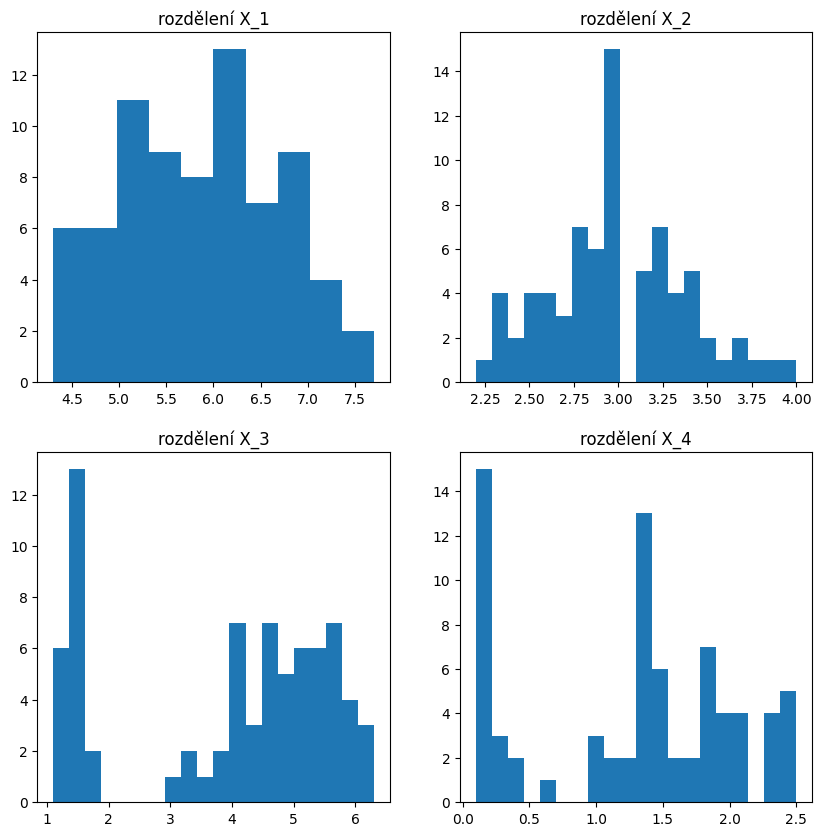

In [11]:
plt.figure(figsize=(10,10));
plt.subplot(221); plt.title('rozdělení X_1'); plt.hist(Xtrain[:,0],bins=10);
plt.subplot(222); plt.title('rozdělení X_2'); plt.hist(Xtrain[:,1],bins=20);
plt.subplot(223); plt.title('rozdělení X_3'); plt.hist(Xtrain[:,2],bins=20);
plt.subplot(224); plt.title('rozdělení X_4'); plt.hist(Xtrain[:,3],bins=20);

Z histogramů není jasné jaké rozdělení by příznaky $X_i$ mohly mít, tedy jaká by měla být hustota pravděpodobnosti $f_{X_i|y}(x_i)$. Částečně za to může i fakt se kterým jsme se setkali dříve, totiž že v datasetu se jedna třída od ostatních viditelně liší (v histogramu bude více vrcholů).

Tím, že nás ale zajímají podmíněná rozdělení, nemusíme se nutně trápit tím, že nepodmíněná rozdělení nevypadají Gaussovsky.

Příslušné histogramy pro jednotlivé třídy můžeme získat tak, že v předchozím nahradíme `Xtrain` pomocí `Xtrain[ytrain == i]`. Situace se tím trochu zlepší, ale dat potom není mnoho.

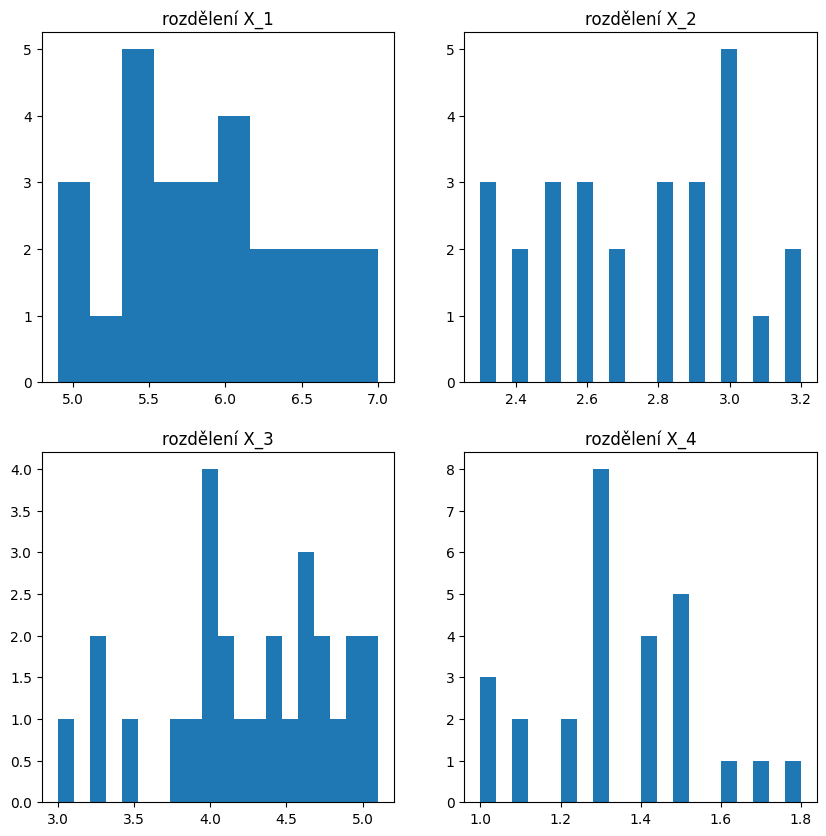

In [12]:
i = 1
plt.figure(figsize=(10,10));
plt.subplot(221); plt.title('rozdělení X_1'); plt.hist(Xtrain[ytrain==i,0],bins=10);
plt.subplot(222); plt.title('rozdělení X_2'); plt.hist(Xtrain[ytrain==i,1],bins=20);
plt.subplot(223); plt.title('rozdělení X_3'); plt.hist(Xtrain[ytrain==i,2],bins=20);
plt.subplot(224); plt.title('rozdělení X_4'); plt.hist(Xtrain[ytrain==i,3],bins=20);

### Použití sklearn implementace

Nyní využijeme `GaussianNB` ze `scikit-learn`, který příslušné podmíněné hustoty odhaduje.

Odhady střední hodnoty a rozptylu, které počítá, jsou dány vztahy
$$
\hat \mu_y = \frac{1}{N_y}\sum_{i}^{N_y} x_i, \quad \hat \sigma^2_y = \frac{1}{N_y}\sum_{i}^{N_y} (x_i - \hat \mu_y)^2,
$$
kde $x_1,\dotsc,x_{N_y}$ jsou hodnoty příznaku $X$, pro které $Y = y$.

In [13]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB();
clf.fit(Xtrain, ytrain);

In [14]:
print('Třídy y:', clf.classes_)
print('Počet vzorků pro každou třídu:',clf.class_count_)
print(f"\nOdhady pravděpodobnosti jednotlivých tříd: {clf.class_prior_}")
print(f"\nOdhad podmíněné střední hodnoty pro každou třídu a příznak:\n{clf.theta_}")
print(f"\nOdhad rozptylu pro každou třídu a příznak:\n{clf.var_}")

Třídy y: [0 1 2]
Počet vzorků pro každou třídu: [21. 27. 27.]

Odhady pravděpodobnosti jednotlivých tříd: [0.28 0.36 0.36]

Odhad podmíněné střední hodnoty pro každou třídu a příznak:
[[4.92380952 3.33333333 1.42380952 0.24285714]
 [5.8962963  2.74074074 4.24814815 1.34074074]
 [6.51851852 2.98148148 5.50740741 2.02222222]]

Odhad rozptylu pro každou třídu a příznak:
[[0.13609978 0.14888889 0.02371882 0.01197279]
 [0.31146777 0.07500686 0.29138546 0.03945131]
 [0.3592867  0.07558299 0.18068587 0.09209877]]


### Ruční výpočet

Ověřte, že se jedná o odhady podle uvedených vztahů

In [15]:
# Váš kód zde

print("Odhady středních hodnot:")
for i in range(ytrain.max()+1):
    print(np.mean(Xtrain[ytrain == i, :],axis = 0))
    
print("\nOdhady roptylů:")
for i in range(ytrain.max()+1):
    print(np.var(Xtrain[ytrain == i, :],ddof = 0, axis = 0))
    

Odhady středních hodnot:
[4.92380952 3.33333333 1.42380952 0.24285714]
[5.8962963  2.74074074 4.24814815 1.34074074]
[6.51851852 2.98148148 5.50740741 2.02222222]

Odhady roptylů:
[0.13609977 0.14888889 0.02371882 0.01197279]
[0.31146776 0.07500686 0.29138546 0.0394513 ]
[0.35928669 0.07558299 0.18068587 0.09209877]


### Úspěšnost predikce

Vyzkoušíme úspěšnost predikce na trénovací a testovací množině.

In [16]:
print(f"Trénovací přesnost modelu je {clf.score(Xtrain, ytrain):.4f}")

print(f"\nValidační přesnost modelu je {clf.score(Xval, yval):.4f}")
ypred = clf.predict(Xval)
print(f"Z {Xval.shape[0]} bodů v Xval je špatně klasifikovaných: {(yval != ypred).sum()}")

Trénovací přesnost modelu je 0.9200

Validační přesnost modelu je 0.9867
Z 75 bodů v Xval je špatně klasifikovaných: 1


### Porovnání s jinými klasifikačními modely

In [17]:
from sklearn.preprocessing import StandardScaler

# Min-max scaler nafitujeme na trénovacích datech
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)

# Následně stejnou transformaci aplikujeme i na validační data
Xval_scaled = scaler.transform(Xval)

# KNN
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(Xtrain_scaled, ytrain)

print(f"Testovací přesnost KNN: {clf.score(Xval_scaled, yval):0.4f}")

# náhodný les
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 42)
clf.fit(Xtrain, ytrain)

print(f"Testovací přesnost náhodného lesa: {clf.score(Xval, yval):0.4f}")

Testovací přesnost KNN: 0.9600
Testovací přesnost náhodného lesa: 0.9867
